# Assignment 4 - Question 1
##### DATA423 Ally Hassell

### Environment

In [1]:
# Import libraries

# Sklearn
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_val_predict, KFold, train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, auc
from sklearn.utils import resample

# Other packages
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np 
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from pySankey.sankey import sankey
import warnings
warnings.filterwarnings("ignore")

### Data

In [2]:
# Data 

# Read in from csv file 
data = pd.read_csv("breast-cancer.csv")

# Sample of dataframe
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
# Structure of data

# Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
# Categorical variable to binary 

# Categorical binary change
categorical_binary = {"M": 1, "B" : 0}

# Replace with binary 
data = data.replace(categorical_binary)

# Show results
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Test train split

In [5]:
# Test train split 

# Split the data into train and test sets
X = data.drop(['id', 'diagnosis'], axis=1)
y = data['diagnosis']

# Test train split 
X_train_set, X_test_set, y_train_set, y_test_set = train_test_split(X, y, test_size=0.3, random_state=7903)

### Resampling

In [6]:
# Unbalanced classes

print("Class benign (B): ", str(X_train_set[y_train_set == 0].shape[0]))
print("Class malignant (M): ", str(X_train_set[y_train_set == 1].shape[0]))

# Upsampling

# Number samples equal
n_upsamples1 = (X_train_set[y_train_set == 0].shape[0] - X_train_set[y_train_set == 1].shape[0])

# Number samples doubled
n_upsamples = X_train_set[y_train_set == 1].shape[0]

# Upsample with replacment
X_upsample, y_upsample = resample(X_train_set[y_train_set == 1], y_train_set[y_train_set == 1], replace=True, n_samples=n_upsamples, random_state=123)

# Append oversample to training data and related labels
X_train_set = np.vstack((X_train_set, X_upsample))
y_train_set = np.hstack((y_train_set, y_upsample))

# Show results
print("After upsampling:")
print("Class benign (B): ", str(X_train_set[y_train_set == 0].shape[0]))
print("Class malignant (M): ", str(X_train_set[y_train_set == 1].shape[0]))

Class benign (B):  254
Class malignant (M):  144
After upsampling:
Class benign (B):  254
Class malignant (M):  288


## Modeling

#### Cross-validation model function

In [7]:
# SVM model

# SVm model
def svm_model(num_components):
    
    # Create an empty list to store individual models
    models = []

    # Perform KFold cross-validation
    kf = KFold(n_splits=10)

    # For loop for CV model
    for train_index, test_index in kf.split(X_train_set):
        X_train, X_test = X_train_set[train_index], X_train_set[test_index]
        y_train, y_test = y_train_set[train_index], y_train_set[test_index]

        # Preprocessing model pipeline
        svm = ImbPipeline(steps=[
        ('smote', SMOTE()),
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=num_components)),
        ('svm', SVC(kernel='rbf', probability=True))
        ])

        # Tune pipeline grid
        param_grid = {
            'svm__C': [0.25, 1, 1.5]
            }

        # Grid search
        svm_model = GridSearchCV(svm, param_grid, scoring="accuracy")

        # Fit this model
        svm_model.fit(X_train, y_train)

        # Append the trained model to the list
        models.append(svm_model)
    return models

# Combine the models into an ensemble
class EnsembleModel:
    def __init__(self, models):
        self.models = models
        
    def predict(self, X):
        predictions = np.array([model.predict(X) for model in self.models])
        return np.mean(predictions, axis=0).astype(int)

#### Model 5 components

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       103
           1       0.97      0.93      0.95        68

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



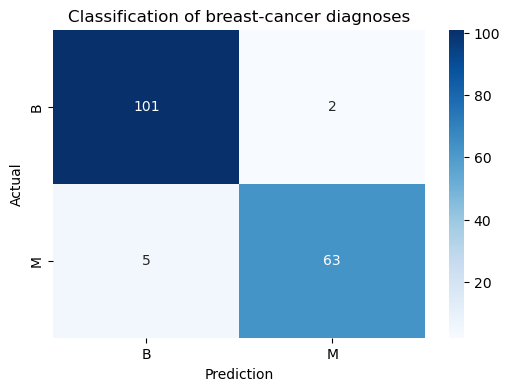

In [8]:
# Call and get performance 5 components

# Number of components
num_comp = 5

# Call model
svm_models = svm_model(num_comp)

# Create an ensemble model
svm_cv_model = EnsembleModel(svm_models)

# Prediction
y_pred = svm_cv_model.predict(X_test_set)

# Classification report
print(classification_report(y_test_set, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test_set, y_pred)

# Plot the confusion matrix
labels = ['B', 'M']  # Assuming 'B' stands for Benign and 'M' stands for Malignant
df_cm = pd.DataFrame(cm, index=labels, columns=labels)
plt.figure(figsize=(6, 4))
sns.heatmap(df_cm, annot=True, cmap='Blues', fmt='g')
plt.title('Classification of breast-cancer diagnoses')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

#### Model 10 components

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       103
           1       1.00      0.93      0.96        68

    accuracy                           0.97       171
   macro avg       0.98      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



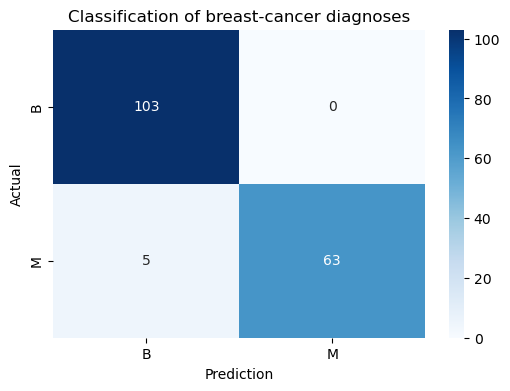

In [9]:
# Call and get performance 10 components

# Number of components
num_comp = 10

# Call model
svm_models = svm_model(num_comp)

# Create an ensemble model
svm_cv_model = EnsembleModel(svm_models)

# Prediction
y_pred = svm_cv_model.predict(X_test_set)

# Classification report
print(classification_report(y_test_set, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test_set, y_pred)

# Plot the confusion matrix
labels = ['B', 'M']  # Assuming 'B' stands for Benign and 'M' stands for Malignant
df_cm = pd.DataFrame(cm, index=labels, columns=labels)
plt.figure(figsize=(6, 4))
sns.heatmap(df_cm, annot=True, cmap='Blues', fmt='g')
plt.title('Classification of breast-cancer diagnoses')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

#### Model 15 components

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       103
           1       1.00      0.93      0.96        68

    accuracy                           0.97       171
   macro avg       0.98      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



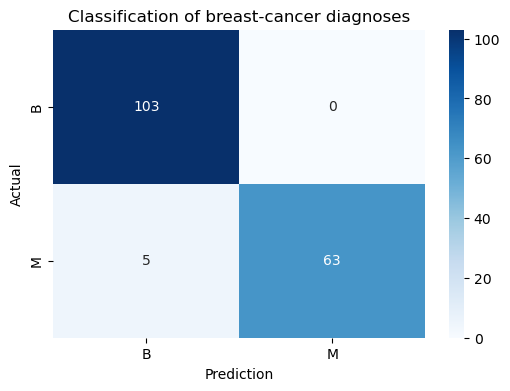

In [10]:
# Call and get performance 15 components

# Number of components
num_comp = 15

# Call model
svm_models = svm_model(num_comp)

# Create an ensemble model
svm_cv_model = EnsembleModel(svm_models)

# Prediction
y_pred = svm_cv_model.predict(X_test_set)

# Classification report
print(classification_report(y_test_set, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test_set, y_pred)

# Plot the confusion matrix
labels = ['B', 'M']  # Assuming 'B' stands for Benign and 'M' stands for Malignant
df_cm = pd.DataFrame(cm, index=labels, columns=labels)
plt.figure(figsize=(6, 4))
sns.heatmap(df_cm, annot=True, cmap='Blues', fmt='g')
plt.title('Classification of breast-cancer diagnoses')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

Text(8, -15, 'Predicted')

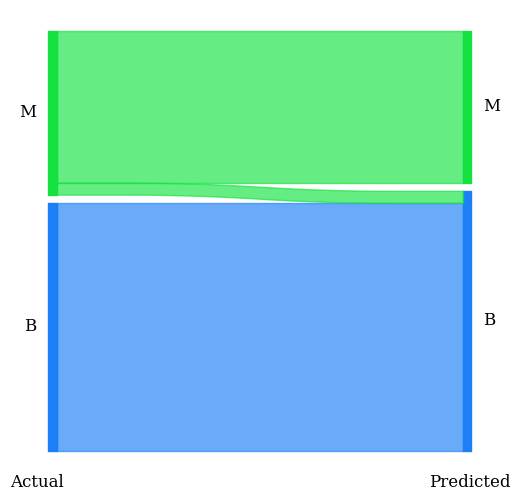

In [11]:
# Sanky diagram

# Actual and predicted into df
sanky_array = np.array([y_test_set, y_pred]) 
sanky_array_transposed = list(map(list, zip(*sanky_array)))
sanky_df = pd.DataFrame(sanky_array_transposed, columns=['Actual', 'Predicted'])
categorical_binary = {1: "M", 0: "B"}
sanky_df = sanky_df.replace(categorical_binary)

# Sanky colours
colors = {
    "B": "#1b7ef7",
    "M": "#12e23f"
}

# Sanky diagram
sankey(sanky_df["Actual"], sanky_df["Predicted"], aspect=20, colorDict=colors, fontsize=12)

# Add text to the figure
plt.text(-1, -15, "Actual", fontsize=12, ha='left')
plt.text(8, -15, "Predicted", fontsize=12, ha='left')